Group Members : Arihant Singh (2019298) , Smiti Chhabra (2019112) , Tushar Mahajan (2019280) ; Group Number : 20

In [16]:
import requests
import pandas as pd
from google.colab import drive
from google.colab import files
import pickle
from imblearn.over_sampling import SMOTE 
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.cluster import AgglomerativeClustering
from xgboost import XGBClassifier
import xgboost
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from scipy import stats
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

In [24]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing necessary libraries :

Loading the dataset :

In [2]:
url = "framingham.csv"
df = pd.read_csv(url)

Data overview

In [122]:
#Printing the dataset
print(df)
#male -> 1, female -> 0 ; subject has the disease -> 1, subject does not have the disease -> 0

      male  age  education  ...  heartRate  glucose  TenYearCHD
0        1   39        4.0  ...       80.0     77.0           0
1        0   46        2.0  ...       95.0     76.0           0
2        1   48        1.0  ...       75.0     70.0           0
3        0   61        3.0  ...       65.0    103.0           1
4        0   46        3.0  ...       85.0     85.0           0
...    ...  ...        ...  ...        ...      ...         ...
4233     1   50        1.0  ...       66.0     86.0           1
4234     1   51        3.0  ...       65.0     68.0           0
4235     0   48        2.0  ...       84.0     86.0           0
4236     0   44        1.0  ...       86.0      NaN           0
4237     0   52        2.0  ...       80.0    107.0           0

[4238 rows x 16 columns]


In [123]:
#Printing the number of rows and columns in the dataset
print(df.shape)

(4238, 16)


In [124]:
#Printing the summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


In [125]:
#Printing some statistical data values for the dataset
print(df.describe())

              male          age  ...      glucose   TenYearCHD
count  4238.000000  4238.000000  ...  3850.000000  4238.000000
mean      0.429212    49.584946  ...    81.966753     0.151958
std       0.495022     8.572160  ...    23.959998     0.359023
min       0.000000    32.000000  ...    40.000000     0.000000
25%       0.000000    42.000000  ...    71.000000     0.000000
50%       0.000000    49.000000  ...    78.000000     0.000000
75%       1.000000    56.000000  ...    87.000000     0.000000
max       1.000000    70.000000  ...   394.000000     1.000000

[8 rows x 16 columns]


In [126]:
#Printing count of all unique values in the dataset
print(df.value_counts)

<bound method DataFrame.value_counts of       male  age  education  ...  heartRate  glucose  TenYearCHD
0        1   39        4.0  ...       80.0     77.0           0
1        0   46        2.0  ...       95.0     76.0           0
2        1   48        1.0  ...       75.0     70.0           0
3        0   61        3.0  ...       65.0    103.0           1
4        0   46        3.0  ...       85.0     85.0           0
...    ...  ...        ...  ...        ...      ...         ...
4233     1   50        1.0  ...       66.0     86.0           1
4234     1   51        3.0  ...       65.0     68.0           0
4235     0   48        2.0  ...       84.0     86.0           0
4236     0   44        1.0  ...       86.0      NaN           0
4237     0   52        2.0  ...       80.0    107.0           0

[4238 rows x 16 columns]>


In [127]:
#Printing all the columns in the dataset
print(df.columns)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [128]:
#Printing sum of all null values in the dataset
print(df.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [129]:
#Printing the count of entries in each feature column
print(df.count())

male               4238
age                4238
education          4133
currentSmoker      4238
cigsPerDay         4209
BPMeds             4185
prevalentStroke    4238
prevalentHyp       4238
diabetes           4238
totChol            4188
sysBP              4238
diaBP              4238
BMI                4219
heartRate          4237
glucose            3850
TenYearCHD         4238
dtype: int64


In [130]:
#Printing the sum of all duplicates in the dataset
print(df.duplicated().sum())

0


In [131]:
#Printing the maximum of values for all the feature columns
print(df.max())

male                 1.0
age                 70.0
education            4.0
currentSmoker        1.0
cigsPerDay          70.0
BPMeds               1.0
prevalentStroke      1.0
prevalentHyp         1.0
diabetes             1.0
totChol            696.0
sysBP              295.0
diaBP              142.5
BMI                 56.8
heartRate          143.0
glucose            394.0
TenYearCHD           1.0
dtype: float64


In [132]:
#Printing the minimum of values for all the feature columns
print(df.min())

male                 0.00
age                 32.00
education            1.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            107.00
sysBP               83.50
diaBP               48.00
BMI                 15.54
heartRate           44.00
glucose             40.00
TenYearCHD           0.00
dtype: float64


In [133]:
#Printing the data types for all the feature columns
print(df.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


Data Visualization

Pie graphs for all unique values of a feature column

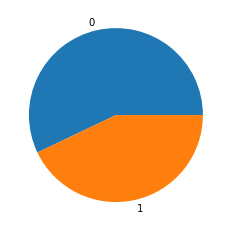

In [134]:
#For 'male' feature column
labels = []
sizes = []

for x, y in df['male'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

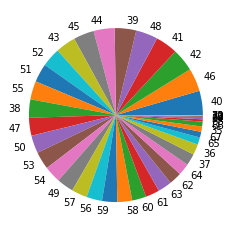

In [135]:
#For 'age' feature column
labels = []
sizes = []

for x, y in df['age'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

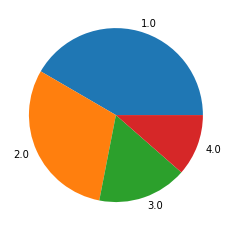

In [136]:
#For 'education' feature column
labels = []
sizes = []

for x, y in df['education'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

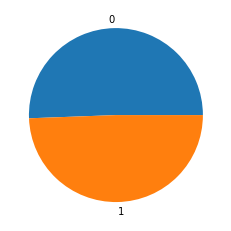

In [137]:
#For 'currentSmoker' feature column
labels = []
sizes = []

for x, y in df['currentSmoker'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

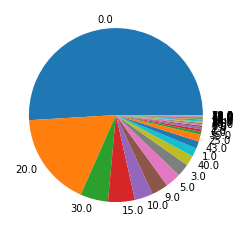

In [138]:
#For 'cigsPerDay' feature column
labels = []
sizes = []

for x, y in df['cigsPerDay'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

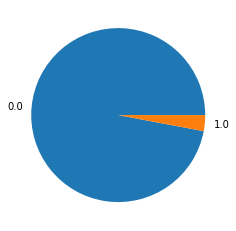

In [139]:
#For 'BPMeds' feature column
labels = []
sizes = []

for x, y in df['BPMeds'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

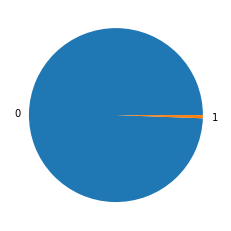

In [140]:
#For 'prevalentStroke' feature column
labels = []
sizes = []

for x, y in df['prevalentStroke'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

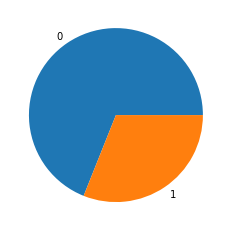

In [141]:
#For 'prevalentHyp' feature column
labels = []
sizes = []

for x, y in df['prevalentHyp'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

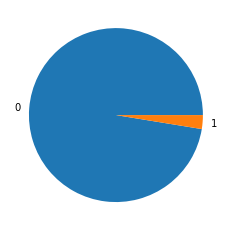

In [142]:
#For 'diabetes' feature column
labels = []
sizes = []

for x, y in df['diabetes'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

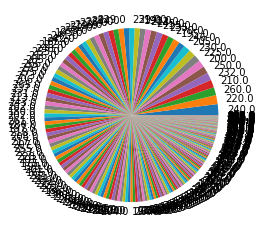

In [143]:
#For 'totChol' feature column
labels = []
sizes = []

for x, y in df['totChol'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

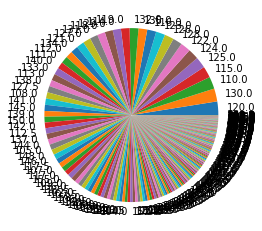

In [144]:
#For 'sysBP' feature column
labels = []
sizes = []

for x, y in df['sysBP'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

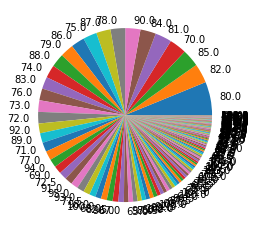

In [145]:
#For 'diaBP' feature column
labels = []
sizes = []

for x, y in df['diaBP'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

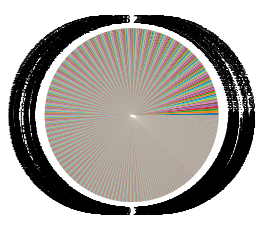

In [146]:
#For 'BMI' feature column
labels = []
sizes = []

for x, y in df['BMI'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

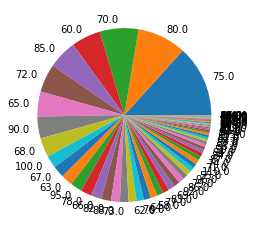

In [147]:
#For 'heartRate' feature column
labels = []
sizes = []

for x, y in df['heartRate'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

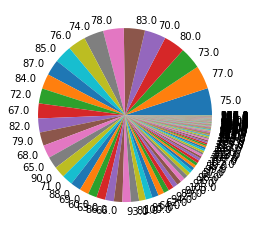

In [148]:
#For 'glucose' feature column
labels = []
sizes = []

for x, y in df['glucose'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

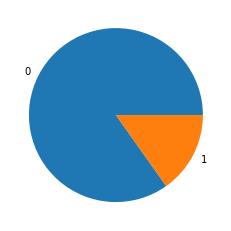

In [149]:
#For 'TenYearCHD' feature column
labels = []
sizes = []

for x, y in df['TenYearCHD'].value_counts().items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)

plt.show()

Histograms for all feature columns

(array([2419.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
       1819.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

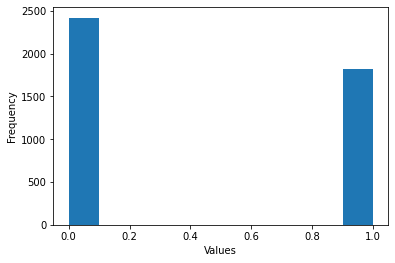

In [150]:
#For 'male' feature column
print(plt.hist(df['male']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([ 66., 489., 704., 651., 445., 566., 508., 439., 298.,  72.]), array([32. , 35.8, 39.6, 43.4, 47.2, 51. , 54.8, 58.6, 62.4, 66.2, 70. ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

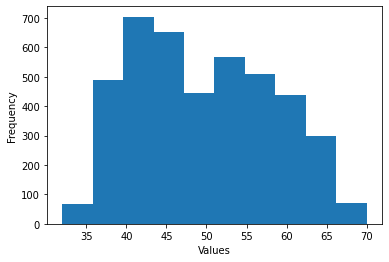

In [151]:
#For 'age' feature column
print(plt.hist(df['age']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([1720.,    0.,    0., 1253.,    0.,    0.,  687.,    0.,    0.,
        473.]), array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

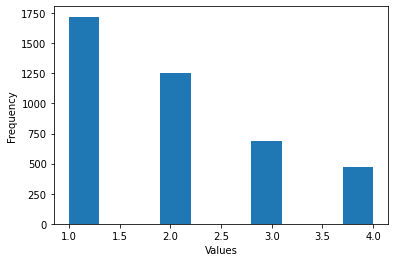

In [152]:
#For 'education' feature column
print(plt.hist(df['education']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([2144.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
       2094.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

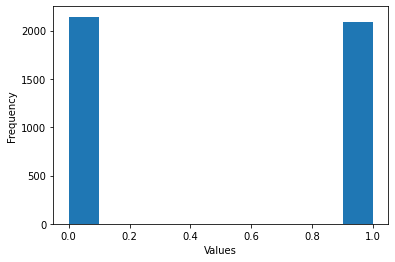

In [153]:
#For 'currentSmoker' feature column
print(plt.hist(df['currentSmoker']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([2.477e+03, 3.070e+02, 9.660e+02, 6.100e+01, 2.180e+02, 1.030e+02,
       5.900e+01, 6.000e+00, 1.100e+01, 1.000e+00]), array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63., 70.]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

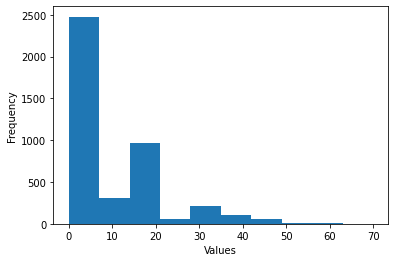

In [154]:
#For 'cigsPerDay' feature column
print(plt.hist(df['cigsPerDay']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([4061.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        124.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

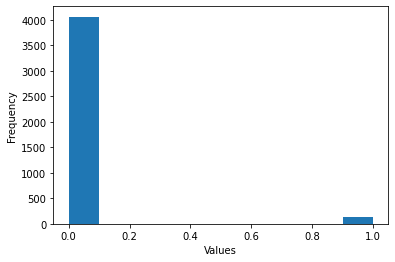

In [155]:
#For 'BPMeds' feature column
print(plt.hist(df['BPMeds']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([4213.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         25.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

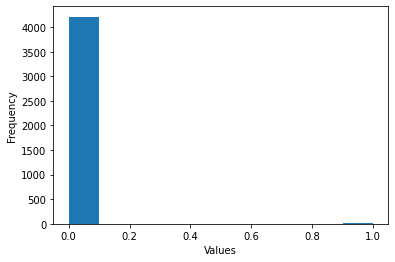

In [156]:
#For 'prevalentStroke' feature column
print(plt.hist(df['prevalentStroke']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([2922.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
       1316.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

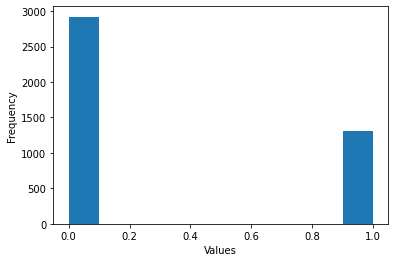

In [157]:
#For 'prevalentHyp' feature column
print(plt.hist(df['prevalentHyp']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([4129.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        109.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

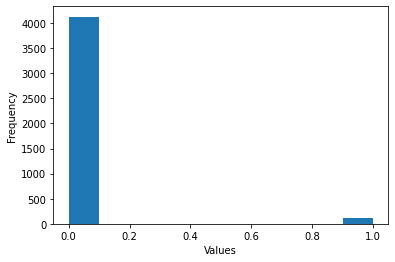

In [158]:
#For 'diabetes' feature column
print(plt.hist(df['diabetes']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([1.640e+02, 1.553e+03, 1.898e+03, 5.030e+02, 6.000e+01, 7.000e+00,
       1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]), array([107. , 165.9, 224.8, 283.7, 342.6, 401.5, 460.4, 519.3, 578.2,
       637.1, 696. ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

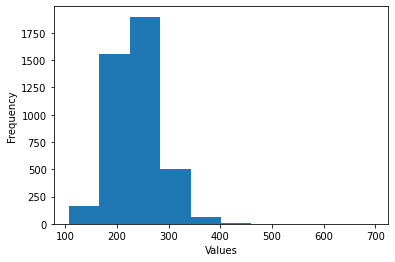

In [159]:
#For 'totChol' feature column
print(plt.hist(df['totChol']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([2.190e+02, 1.642e+03, 1.472e+03, 6.040e+02, 2.060e+02, 7.800e+01,
       1.100e+01, 5.000e+00, 0.000e+00, 1.000e+00]), array([ 83.5 , 104.65, 125.8 , 146.95, 168.1 , 189.25, 210.4 , 231.55,
       252.7 , 273.85, 295.  ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

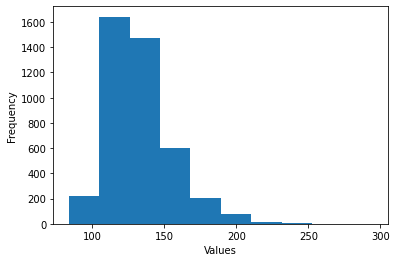

In [160]:
#For 'sysBP' feature column
print(plt.hist(df['sysBP']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([  18.,  242., 1015., 1427.,  966.,  358.,  150.,   38.,   18.,
          6.]), array([ 48.  ,  57.45,  66.9 ,  76.35,  85.8 ,  95.25, 104.7 , 114.15,
       123.6 , 133.05, 142.5 ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

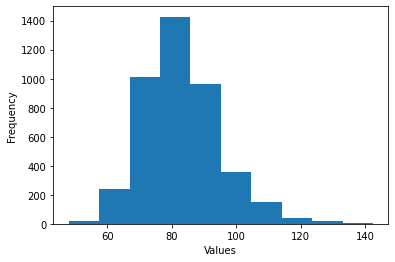

In [161]:
#For 'diaBP' feature column
print(plt.hist(df['diaBP']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([1.58e+02, 1.21e+03, 1.75e+03, 8.24e+02, 1.96e+02, 5.80e+01,
       1.70e+01, 4.00e+00, 1.00e+00, 1.00e+00]), array([15.54 , 19.666, 23.792, 27.918, 32.044, 36.17 , 40.296, 44.422,
       48.548, 52.674, 56.8  ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

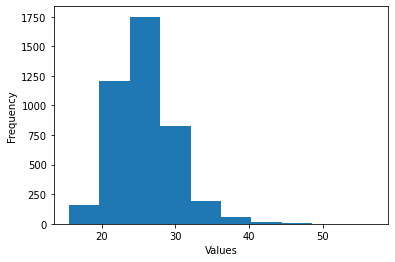

In [162]:
#For 'BMI' feature column
print(plt.hist(df['BMI']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([  61.,  538., 1260., 1357.,  645.,  286.,   70.,   14.,    4.,
          2.]), array([ 44. ,  53.9,  63.8,  73.7,  83.6,  93.5, 103.4, 113.3, 123.2,
       133.1, 143. ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

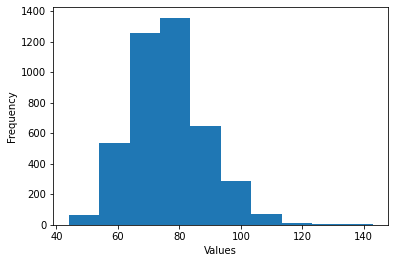

In [163]:
#For 'heartRate' feature column
print(plt.hist(df['heartRate']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([1572., 2097.,  127.,   16.,   13.,    6.,    7.,    4.,    3.,
          5.]), array([ 40. ,  75.4, 110.8, 146.2, 181.6, 217. , 252.4, 287.8, 323.2,
       358.6, 394. ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

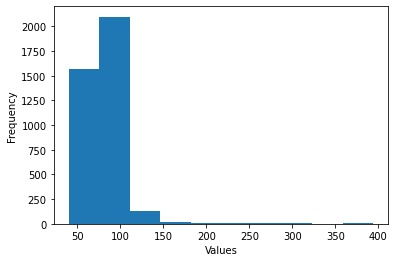

In [164]:
#For 'glucose' feature column
print(plt.hist(df['glucose']))
plt.xlabel("Values")
plt.ylabel("Frequency")

(array([3594.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        644.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


Text(0, 0.5, 'Frequency')

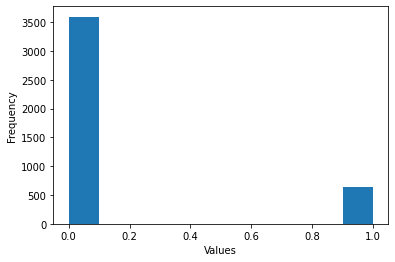

In [165]:
#For 'TenYearCHD' feature column
print(plt.hist(df['TenYearCHD']))
plt.xlabel("Values")
plt.ylabel("Frequency")

Plots for each feature column

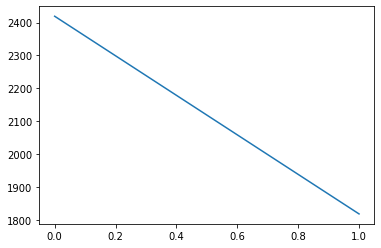

In [166]:
#For 'male' feature column
print(plt.plot(df['male'].value_counts()))

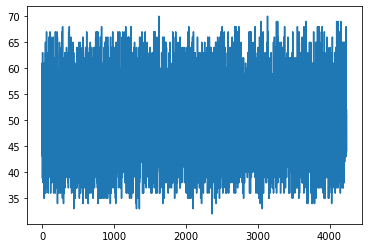

In [167]:
#For 'age' feature column
print(plt.plot(df['age']))

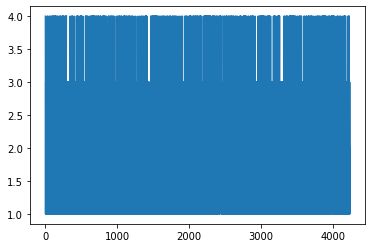

In [168]:
#For 'education' feature column
print(plt.plot(df['education']))

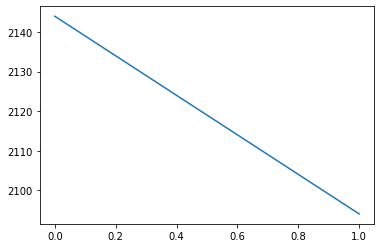

In [169]:
#For 'currentSmoker' feature column
print(plt.plot(df['currentSmoker'].value_counts()))

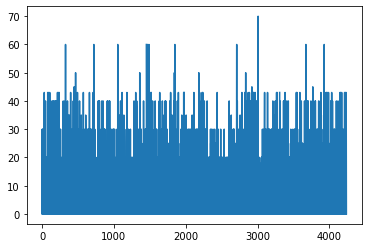

In [170]:
#For 'cigsPerDay' feature column
print(plt.plot(df['cigsPerDay']))

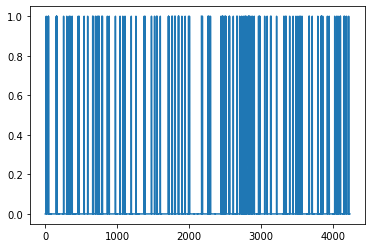

In [171]:
#For 'BPMeds' feature column
print(plt.plot(df['BPMeds']))

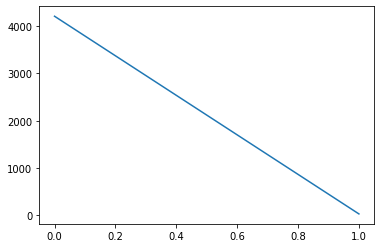

In [172]:
#For 'prevalentStroke' feature column
print(plt.plot(df['prevalentStroke'].value_counts()))

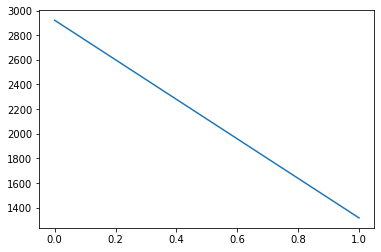

In [173]:
#For 'prevalentHyp' feature column
print(plt.plot(df['prevalentHyp'].value_counts()))

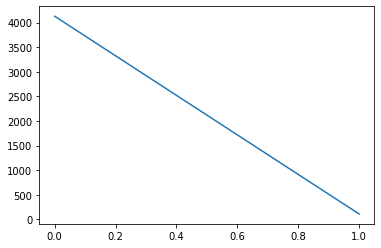

In [174]:
#For 'diabetes' feature column
print(plt.plot(df['diabetes'].value_counts()))

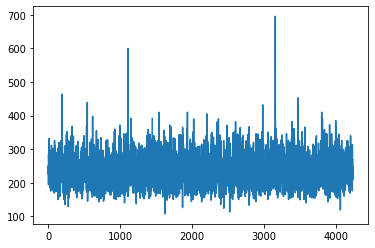

In [175]:
#For 'totChol' feature column
print(plt.plot(df['totChol']))

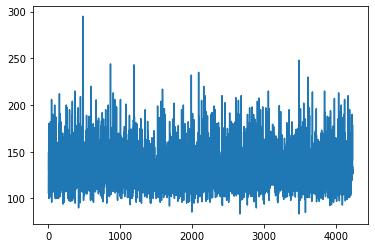

In [176]:
#For 'sysBP' feature column
print(plt.plot(df['sysBP']))

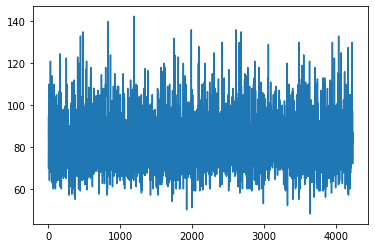

In [177]:
#For 'diaBP' feature column
print(plt.plot(df['diaBP']))

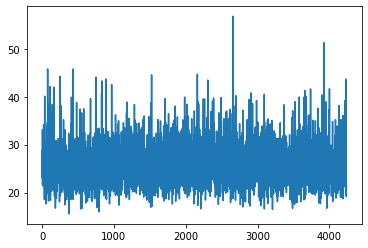

In [178]:
#For 'BMI' feature column
print(plt.plot(df['BMI']))

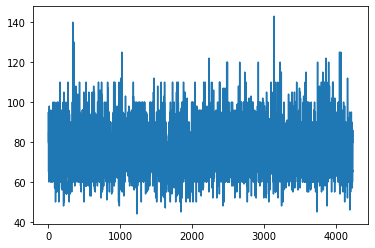

In [179]:
#For 'heartRate' feature column
print(plt.plot(df['heartRate']))

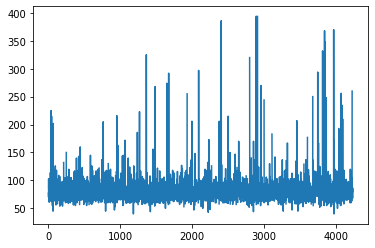

In [180]:
#For 'glucose' feature column
print(plt.plot(df['glucose']))

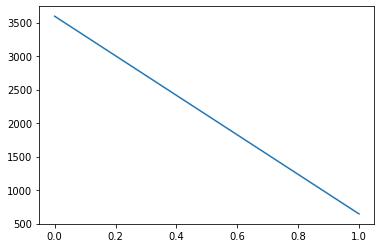

In [181]:
#For 'TenYearCHD' feature column
print(plt.plot(df['TenYearCHD'].value_counts()))

Scatter Plots for each column with the output column ("TenYearCHD")

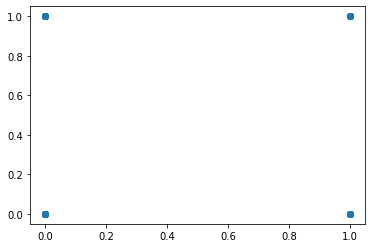

In [182]:
#For 'male' feature column
print(plt.scatter(df['male'],df['TenYearCHD']))

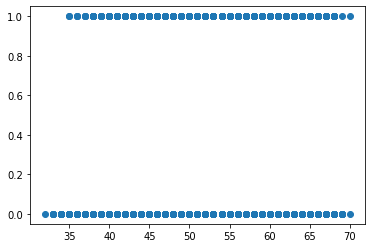

In [183]:
#For 'age' feature column
print(plt.scatter(df['age'],df['TenYearCHD']))

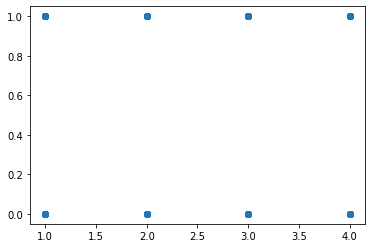

In [184]:
#For 'education' feature column
print(plt.scatter(df['education'],df['TenYearCHD']))

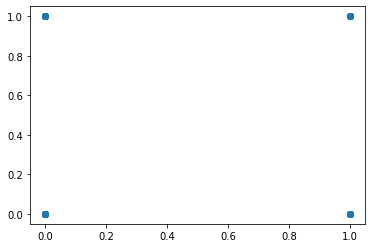

In [185]:
#For 'currentSmoker' feature column
print(plt.scatter(df['currentSmoker'],df['TenYearCHD']))

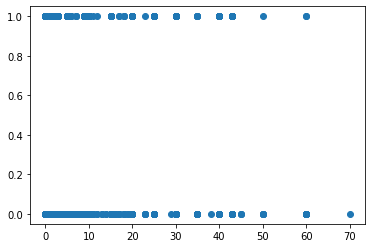

In [186]:
#For 'cigsPerDay' feature column
print(plt.scatter(df['cigsPerDay'],df['TenYearCHD']))

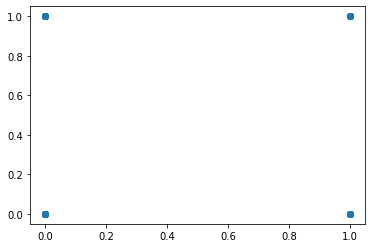

In [187]:
#For 'BPMeds' feature column
print(plt.scatter(df['BPMeds'],df['TenYearCHD']))

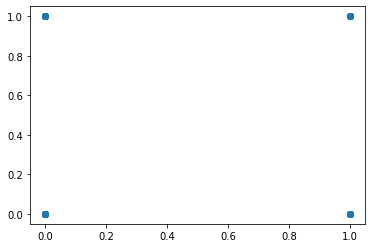

In [188]:
#For 'prevalentStroke' feature column
print(plt.scatter(df['prevalentStroke'],df['TenYearCHD']))

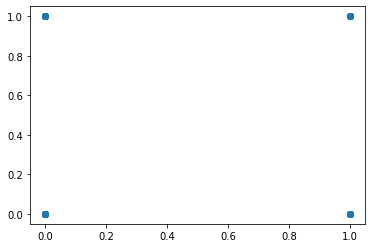

In [189]:
#For 'prevalentHyp' feature column
print(plt.scatter(df['prevalentHyp'],df['TenYearCHD']))

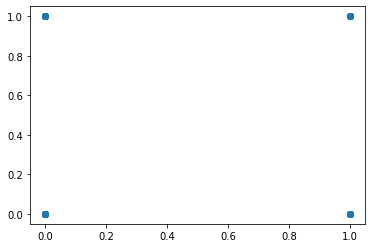

In [190]:
#For 'diabetes' feature column
print(plt.scatter(df['diabetes'],df['TenYearCHD']))

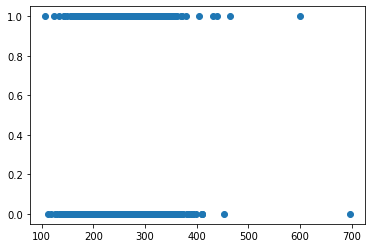

In [191]:
#For 'totChol' feature column
print(plt.scatter(df['totChol'],df['TenYearCHD']))

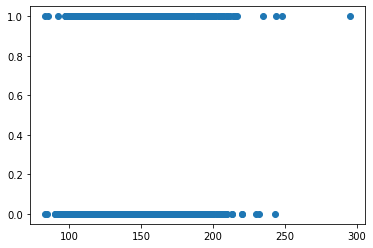

In [192]:
#For 'sysBP' feature column
print(plt.scatter(df['sysBP'],df['TenYearCHD']))

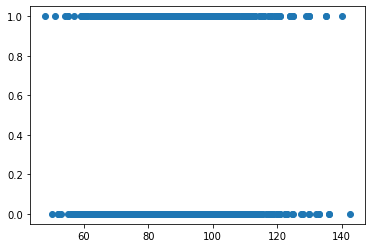

In [193]:
#For 'diaBP' feature column
print(plt.scatter(df['diaBP'],df['TenYearCHD']))

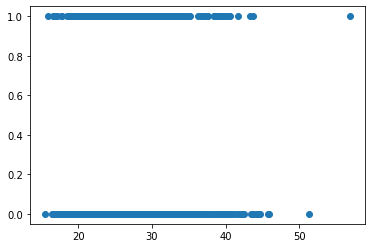

In [194]:
#For 'BMI' feature column
print(plt.scatter(df['BMI'],df['TenYearCHD']))

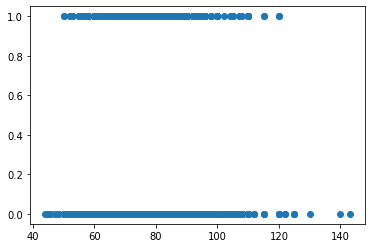

In [195]:
#For 'heartRate' feature column
print(plt.scatter(df['heartRate'],df['TenYearCHD']))

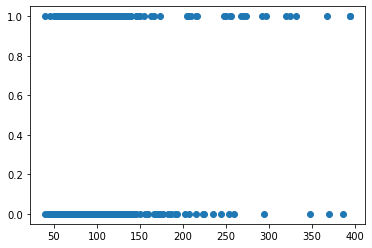

In [196]:
#For 'glucose' feature column
print(plt.scatter(df['glucose'],df['TenYearCHD']))

KDE Plots for each feature column

No handles with labels found to put in legend.


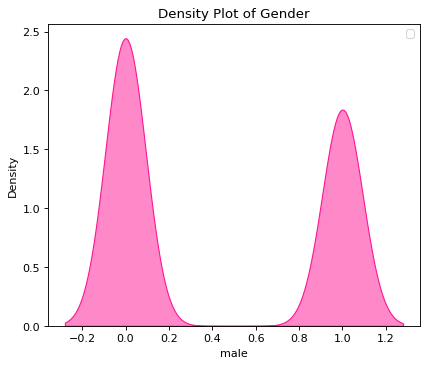

In [197]:
#For "male" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['male'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Gender', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


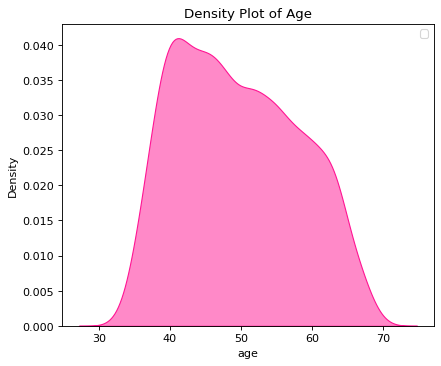

In [198]:
#For "age" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['age'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Age', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


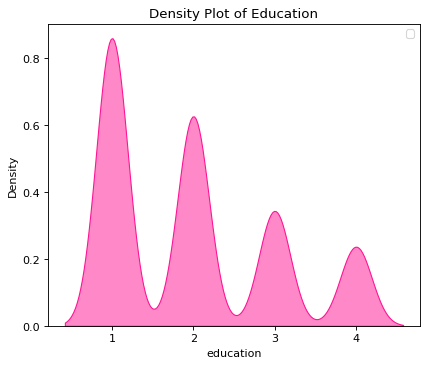

In [199]:
#For "education" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['education'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Education', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


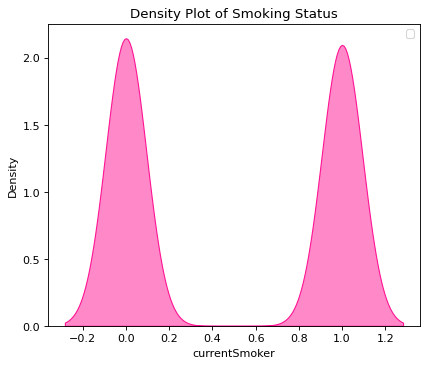

In [200]:
#For "currentSmoker" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['currentSmoker'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Smoking Status', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


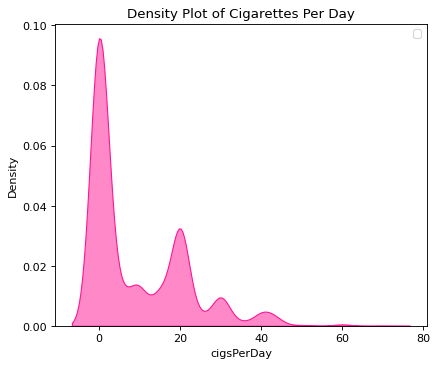

In [201]:
#For "cigsPerDay" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['cigsPerDay'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Cigarettes Per Day', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


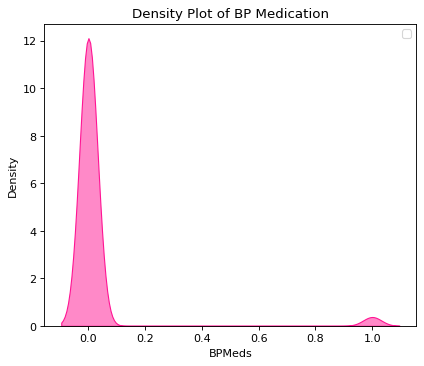

In [202]:
#For "BPMeds" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['BPMeds'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of BP Medication', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


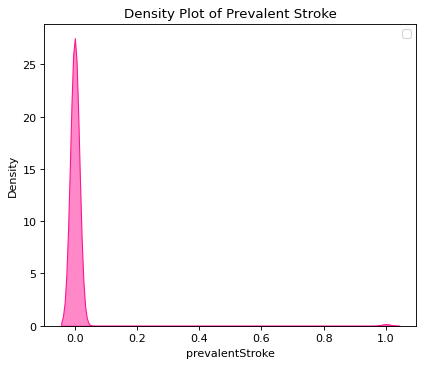

In [203]:
#For "prevalentStroke" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['prevalentStroke'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Prevalent Stroke', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


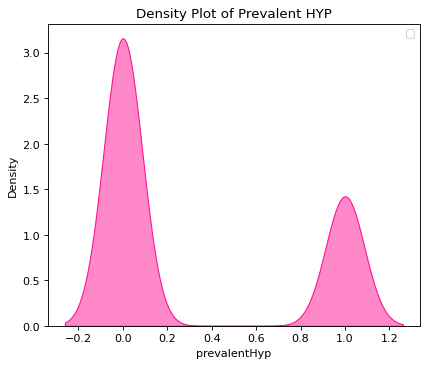

In [204]:
#For "prevalentHyp" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['prevalentHyp'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Prevalent HYP', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


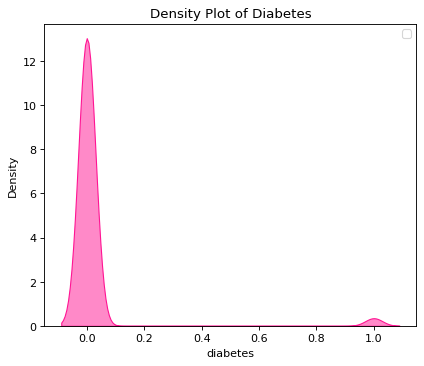

In [205]:
#For "diabetes" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['diabetes'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Diabetes', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


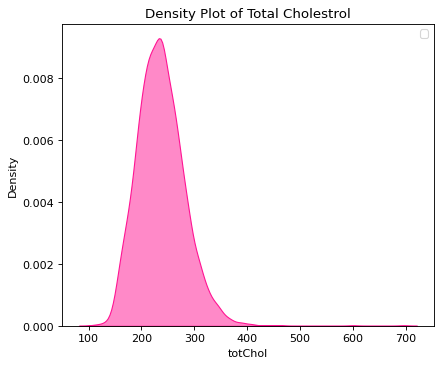

In [206]:
#For "totChol" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['totChol'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Total Cholestrol', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


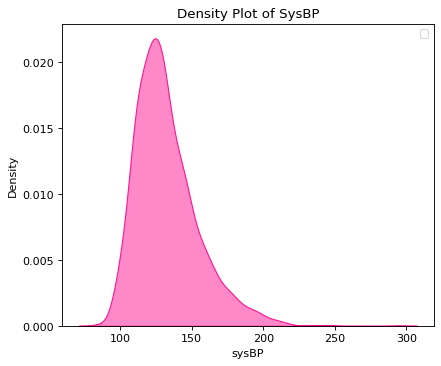

In [207]:
#For "sysBP" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['sysBP'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of SysBP', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


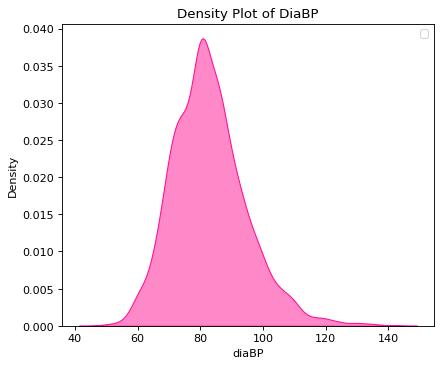

In [208]:
#For "diaBP" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['diaBP'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of DiaBP', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


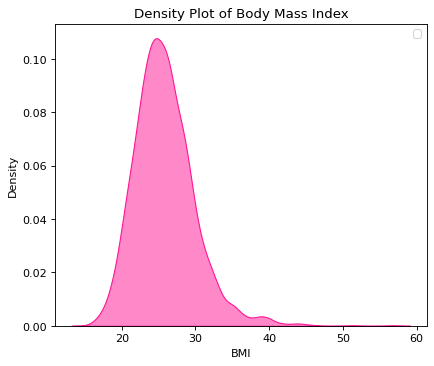

In [209]:
#For "BMI" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['BMI'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Body Mass Index', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


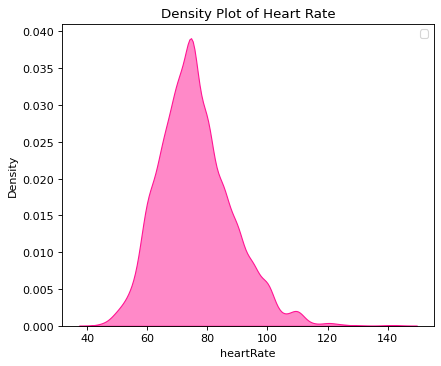

In [210]:
#For "heartRate" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['heartRate'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Heart Rate', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


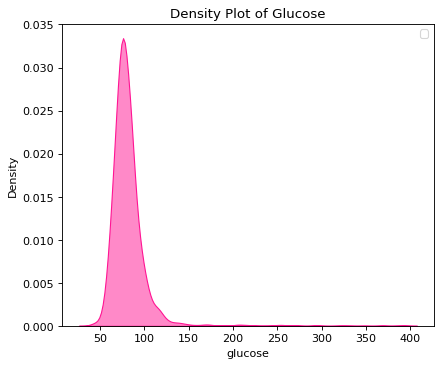

In [211]:
#For "glucose" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['glucose'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Glucose', fontsize=12)
plt.legend()
plt.show()

No handles with labels found to put in legend.


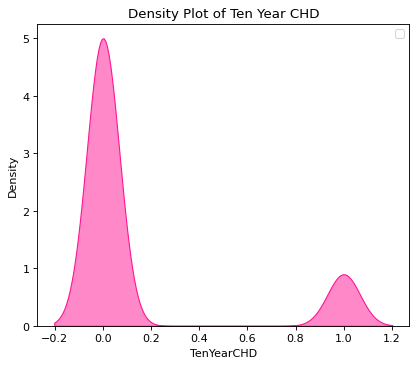

In [212]:
#For "TenYearCHD" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(df['TenYearCHD'], shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Ten Year CHD', fontsize=12)
plt.legend()
plt.show()

Heatmap for the correlation matrix of the dataset

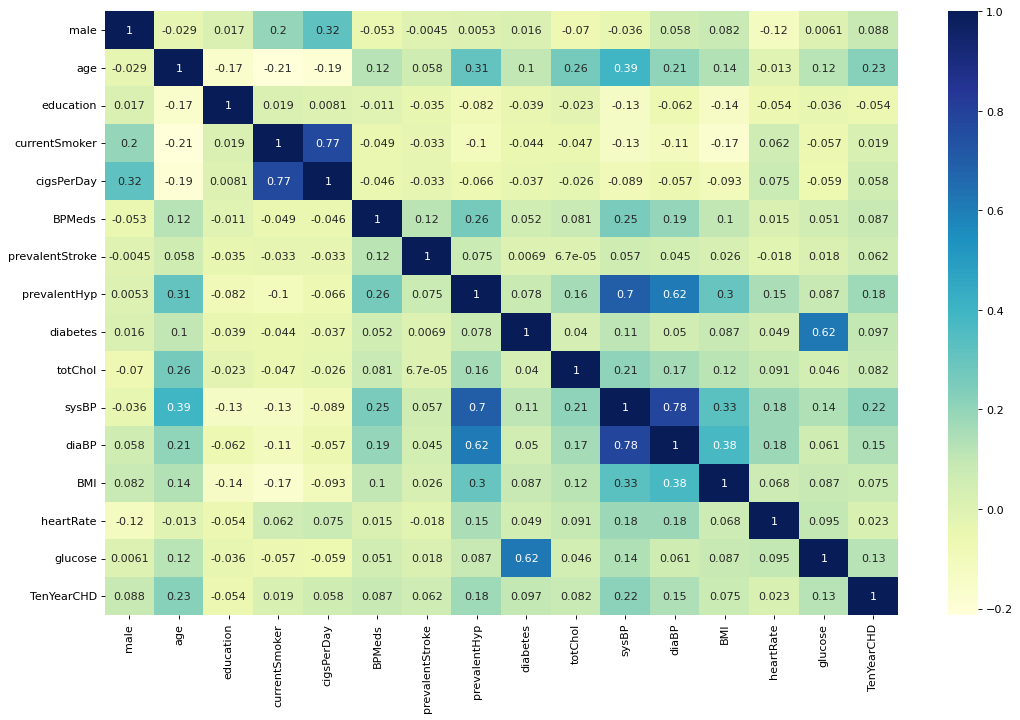

In [263]:
plt.figure(figsize=(16,10), dpi= 80)
df.corr()
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Converting integer type feature columns to float type feature columns

In [214]:
df['male'] = df['male'].astype(float)
df['age'] = df['age'].astype(float)
df['currentSmoker'] = df['currentSmoker'].astype(float)
df['prevalentStroke'] = df['prevalentStroke'].astype(float)
df['prevalentHyp'] = df['prevalentHyp'].astype(float)
df['diabetes'] = df['diabetes'].astype(float)
df['TenYearCHD'] = df['TenYearCHD'].astype(float)

Pre-Processing Steps

*Note : We tried different combinations of preprocessing steps to reach the final conclusion along with evaluating the different models at each of the stages using the metrics mentioned below(also mentioned in the report and ppt)*

Filling missing values for a feature column with their respective means

In [3]:
#For "cisPerDay" feature column
meanCigs = df['cigsPerDay'].mean()
df['cigsPerDay'] = df['cigsPerDay'].fillna(meanCigs)

In [4]:
#For "totChol" feature column
meanTotChol = df['totChol'].mean()
df['totChol'] = df['totChol'].fillna(meanTotChol)

In [5]:
#For "BPMeds" feature column
meanBPMeds = df['BPMeds'].mean()
df['BPMeds'] = df['BPMeds'].fillna(meanBPMeds)
df = df.dropna()

Dropping all null values

In [6]:
df = df.dropna()

Dropping feature columns using feature selection

In [7]:
#Dropping "education" feature column
df = df.drop(['education'], axis = 1)
#Dropping "glucose" feature column
df = df.drop(['glucose'], axis = 1)
#Dropping "diaBP" feature column
df = df.drop(['diaBP'], axis = 1)
#Dropping "currentSmoker" feature column
df = df.drop(['currentSmoker'], axis = 1)

Grouping of features with continuous values

Note : We tried grouping of features for various continuous valued features but didn't include it in the final preprocessing steps

In [220]:
#For "age" feature column
def get_age_bin(age_column):
  age_column_copy=np.empty(age_column.shape,dtype=object)
  age_column_copy[age_column<40]=1
  age_column_copy[np.where((age_column<50) & (age_column>=40))]=2
  age_column_copy[np.where((age_column<60) & (age_column>=50))]=3
  age_column_copy[np.where((age_column<=70) & (age_column>=60))]=4
  return age_column_copy

def bin_age(df):
  df['age_categorical']=get_age_bin(np.array(df['age']))
  df = df.drop(['age'], axis=1)
  #df = pd.get_dummies(df)
  return df

df = bin_age(df)

In [221]:
#For "totChol" feature column
def get_totChol_bin(totChol_column):
  totChol_column_copy=np.empty(totChol_column.shape,dtype=object)
  totChol_column_copy[totChol_column<200]=1
  totChol_column_copy[np.where((totChol_column<240) & (totChol_column>=200))]=2
  totChol_column_copy[totChol_column>=240]=3
  return totChol_column_copy

def bin_totChol(df):
  df['totChol_categorical']=get_totChol_bin(np.array(df['totChol']))
  df = df.drop(['totChol'], axis=1)
  #df = pd.get_dummies(df)
  return df

df = bin_totChol(df)

Removing ouliers using z-score method

In [8]:
z_score_data = np.abs(stats.zscore(df))
print(z_score_data)
threshold = 3
temp_arr_new = np.where(z_score_data > threshold)[0]
df.drop(df.index[temp_arr_new],inplace=True)
print(df)

[[1.12580407 1.23787401 0.75803165 ... 0.29151181 0.354192   0.4245467 ]
 [0.88825403 0.42066984 0.75803165 ... 0.72432261 1.60899955 0.4245467 ]
 [1.12580407 0.18718294 0.92547901 ... 0.10933    0.06407718 0.4245467 ]
 ...
 [1.12580407 0.16304742 2.86151627 ... 1.49383271 0.90061555 0.4245467 ]
 [0.88825403 0.18718294 0.92547901 ... 0.93068685 0.68880735 0.4245467 ]
 [0.88825403 0.27979087 0.75803165 ... 1.06102192 0.354192   0.4245467 ]]
      male  age  cigsPerDay   BPMeds  ...  sysBP    BMI  heartRate  TenYearCHD
0        1   39         0.0  0.00000  ...  106.0  26.97       80.0           0
1        0   46         0.0  0.00000  ...  121.0  28.73       95.0           0
2        1   48        20.0  0.00000  ...  127.5  25.34       75.0           0
3        0   61        30.0  0.00000  ...  150.0  28.58       65.0           1
4        0   46        23.0  0.00000  ...  130.0  23.10       85.0           0
...    ...  ...         ...      ...  ...    ...    ...        ...         ...
423

Balancing the dataset using SMOTE

In [9]:
df3 = df['TenYearCHD']
df2 = df.drop(['TenYearCHD'],axis = 1)
sm = SMOTE()
X_res, y_res = sm.fit_resample(df2, df3)
print(X_res.shape)
print(y_res.shape)

(5868, 11)
(5868,)


Scaling

 *Note : We tried normalization but didn't include it in the final preprocessing steps*

In [238]:
#Normalization using "MinMaxScaler" technique
sc = MinMaxScaler()
scaled_data = sc.fit_transform(df)

In [10]:
#Standardization 
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(df)

Dividing the dataset using train : test ratio as 8 : 2

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df2, df3, test_size = 0.2,random_state = 0)

Dimensional reduction using PCA

In [12]:
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

Making different models and evaluating them based on different evaluation metrics ( Accuracy, Precision, Recall, and Confusion Matrix)

In [39]:
#Making "Logistic Regression" model
lr = LogisticRegression()
#Fitting the model
lr.fit(x_train, y_train)
#Predicting the output
y_pred1 = lr.predict(x_test)
#Printing the accuracy
print(metrics.accuracy_score(y_test, y_pred1))
#Printing the precision
print(metrics.precision_score(y_test,y_pred1))
#Printing the recall
print(metrics.recall_score(y_test,y_pred1))
#Printing the Confusion Matrix
print("Confusion Matrix(in format [TN,FN],[FP,TP]):",confusion_matrix(y_test,y_pred1))

lr_probs=lr.predict_proba(x_test)
lr_probs=lr_probs[:,1]
lr_auc=roc_auc_score(y_test,lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

path1 = F"/content/gdrive/My Drive/Colab Notebooks/lr_model"
lr_weights = pickle.dump(lr,open(path1,'wb'))

0.8647058823529412
1.0
0.010752688172043012
Confusion Matrix(in format [TN,FN],[FP,TP]): [[587   0]
 [ 92   1]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [37]:
#Making "Decision Tree Classifier" model
dtc = DecisionTreeClassifier()
#Fitting the model
dtc.fit(x_train, y_train)
#Predicting the output
y_pred4 = dtc.predict(x_test)
#Printing the accuracy
print(metrics.accuracy_score(y_test, y_pred4))
#Printing the precision
print(metrics.precision_score(y_test,y_pred4))
#Printing the recall
print(metrics.recall_score(y_test,y_pred4))
#Printing the Confusion Matrix
print("Confusion Matrix(in format [TN,FN],[FP,TP]):",confusion_matrix(y_test,y_pred4))

dtc_probs=dtc.predict_proba(x_test)
dtc_probs=dtc_probs[:,1]
dtc_auc=roc_auc_score(y_test,dtc_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)

path1 = F"/content/gdrive/My Drive/Colab Notebooks/dtc_model"
dtc_weights = pickle.dump(dtc,open(path1,'wb'))

0.7647058823529411
0.1981981981981982
0.23655913978494625
Confusion Matrix(in format [TN,FN],[FP,TP]): [[498  89]
 [ 71  22]]


In [40]:
#Making "GaussianNB" model
gnb = GaussianNB()
#Fitting the model
gnb.fit(x_train, y_train)
#Predicting the output
y_pred5 = gnb.predict(x_test)
#Printing the accuracy
print(metrics.accuracy_score(y_test, y_pred5))
#printing the precision
print(metrics.precision_score(y_test,y_pred5))
#Printing the recall
print(metrics.recall_score(y_test,y_pred5))
#Printing the Confusion Matrix
print("Confusion Matrix(in format [TN,FN],[FP,TP]):",confusion_matrix(y_test,y_pred5))

gnb_probs=gnb.predict_proba(x_test)
gnb_probs=gnb_probs[:,1]
gnb_auc=roc_auc_score(y_test,gnb_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)

path1 = F"/content/gdrive/My Drive/Colab Notebooks/gnb_model"
gnb_weights = pickle.dump(gnb,open(path1,'wb'))

0.8058823529411765
0.27586206896551724
0.25806451612903225
Confusion Matrix(in format [TN,FN],[FP,TP]): [[524  63]
 [ 69  24]]


In [41]:
#Making the "Random Forest" model
rfc = RandomForestClassifier()
#Fitting the model
rfc.fit(x_train, y_train)
#Predicting the output
y_pred3 = rfc.predict(x_test)
#Printing the accuracy
print(metrics.accuracy_score(y_test, y_pred3))
#Printing the precision
print(metrics.precision_score(y_test,y_pred3))
#Printing the recall
print(metrics.recall_score(y_test,y_pred3))
#Printing the Confusion Matrix
print("Confusion Matrix(in format [TN,FN],[FP,TP]):",confusion_matrix(y_test,y_pred3))

rfc_probs=rfc.predict_proba(x_test)
rfc_probs=rfc_probs[:,1]
rfc_auc=roc_auc_score(y_test,rfc_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)

path1 = F"/content/gdrive/My Drive/Colab Notebooks/rfc_model"
rfc_weights = pickle.dump(rfc,open(path1,'wb'))

0.861764705882353
0.46153846153846156
0.06451612903225806
Confusion Matrix(in format [TN,FN],[FP,TP]): [[580   7]
 [ 87   6]]


In [46]:
#Making the "KNN" model
neigh = KNeighborsClassifier(n_neighbors = 3)
#Fitting the model
neigh.fit(x_train, y_train)
#Predicting the output
y_pred33 = neigh.predict(x_test)
#Printing the accuracy
print(metrics.accuracy_score(y_test, y_pred33))
#Printing the precision
print(metrics.precision_score(y_test,y_pred33))
#Printing the recall
print(metrics.recall_score(y_test,y_pred33))
#Printing the Confusion Matrix
print("Confusion Matrix(in format [TN,FN],[FP,TP]):",confusion_matrix(y_test,y_pred33))

neigh_probs=neigh.predict_proba(x_test)
neigh_probs=neigh_probs[:,1]
neigh_auc=roc_auc_score(y_test,neigh_probs)
neigh_fpr, neigh_tpr, _ = roc_curve(y_test, neigh_probs)

path1 = F"/content/gdrive/My Drive/Colab Notebooks/neigh_model"
neigh_weights = pickle.dump(neigh,open(path1,'wb'))

0.8338235294117647
0.2727272727272727
0.12903225806451613
Confusion Matrix(in format [TN,FN],[FP,TP]): [[555  32]
 [ 81  12]]


In [47]:
#Making the "AdaBoost Classifier" model
adb = AdaBoostClassifier()
#Fitting the model
adb.fit(x_train, y_train)
#Predicting the output
y_pred6 = adb.predict(x_test)
#Printing the accuracy
print(metrics.accuracy_score(y_test, y_pred6))
#Printing the precision
print(metrics.precision_score(y_test,y_pred6))
#Printing the recall
print(metrics.recall_score(y_test,y_pred6))
#Printing the Confusion Matrix
print("Confusion Matrix(in format [TN,FN],[FP,TP]):",confusion_matrix(y_test,y_pred6))

adb_probs=adb.predict_proba(x_test)
adb_probs=adb_probs[:,1]
adb_auc=roc_auc_score(y_test,adb_probs)
adb_fpr, adb_tpr, _ = roc_curve(y_test, adb_probs)

path1 = F"/content/gdrive/My Drive/Colab Notebooks/adb_model"
adb_weights = pickle.dump(adb,open(path1,'wb'))

0.8588235294117647
0.4
0.06451612903225806
Confusion Matrix(in format [TN,FN],[FP,TP]): [[578   9]
 [ 87   6]]


In [49]:
clf_sgd = SGDClassifier(loss="hinge", penalty="l2")
clf_sgd.fit(x_train, y_train)
y_pred7 = clf_sgd.predict(x_test)
#Printing the accuracy
print(metrics.accuracy_score(y_test, y_pred7))
#Printing the precision
print(metrics.precision_score(y_test,y_pred7))
#Printing the recall
print(metrics.recall_score(y_test,y_pred7))
#Printing the Confusion Matrix
print("Confusion Matrix(in format [TN,FN],[FP,TP]):",confusion_matrix(y_test,y_pred7))

path1 = F"/content/gdrive/My Drive/Colab Notebooks/sgd_model"
sgd_weights = pickle.dump(clf_sgd,open(path1,'wb'))

0.8632352941176471
0.0
0.0
Confusion Matrix(in format [TN,FN],[FP,TP]): [[587   0]
 [ 93   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
clf_svm = svm.SVC()
clf_svm.fit(x_train, y_train)
y_pred8 = clf_svm.predict(x_test)
#Printing the accuracy
print(metrics.accuracy_score(y_test, y_pred8))
#Printing the precision
print(metrics.precision_score(y_test,y_pred8))
#Printing the recall
print(metrics.recall_score(y_test,y_pred8))
#Printing the Confusion Matrix
print("Confusion Matrix(in format [TN,FN],[FP,TP]):",confusion_matrix(y_test,y_pred8))

path1 = F"/content/gdrive/My Drive/Colab Notebooks/svm_model"
svm_weights = pickle.dump(clf_svm,open(path1,'wb'))

0.8632352941176471
0.0
0.0
Confusion Matrix(in format [TN,FN],[FP,TP]): [[587   0]
 [ 93   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trying different regularization methods

In [51]:
#Ridge Regression
clf_ridge = Ridge(alpha=0.01)
clf_ridge.fit(x_train, y_train)
y_pred11 = clf_ridge.predict(x_test)
temp1 = mean_squared_error(y_test,clf_ridge.predict(x_test))
print(temp1)

path1 = F"/content/gdrive/My Drive/Colab Notebooks/ridge_regularization"
ridge_weights = pickle.dump(clf_ridge,open(path1,'wb'))

0.11021416820435623


In [52]:
#Lasso Regression
clf_lasso = Lasso(alpha=0.01)
clf_lasso.fit(x_train, y_train)
y_pred12 = clf_lasso.predict(x_test)
temp2 = mean_squared_error(y_test,clf_lasso.predict(x_test))
print(temp2)

path1 = F"/content/gdrive/My Drive/Colab Notebooks/lasso_regression"
lasso_weights = pickle.dump(clf_lasso,open(path1,'wb'))

0.10990059674278446


Output visualization and analysis

Heatmap after feature selection

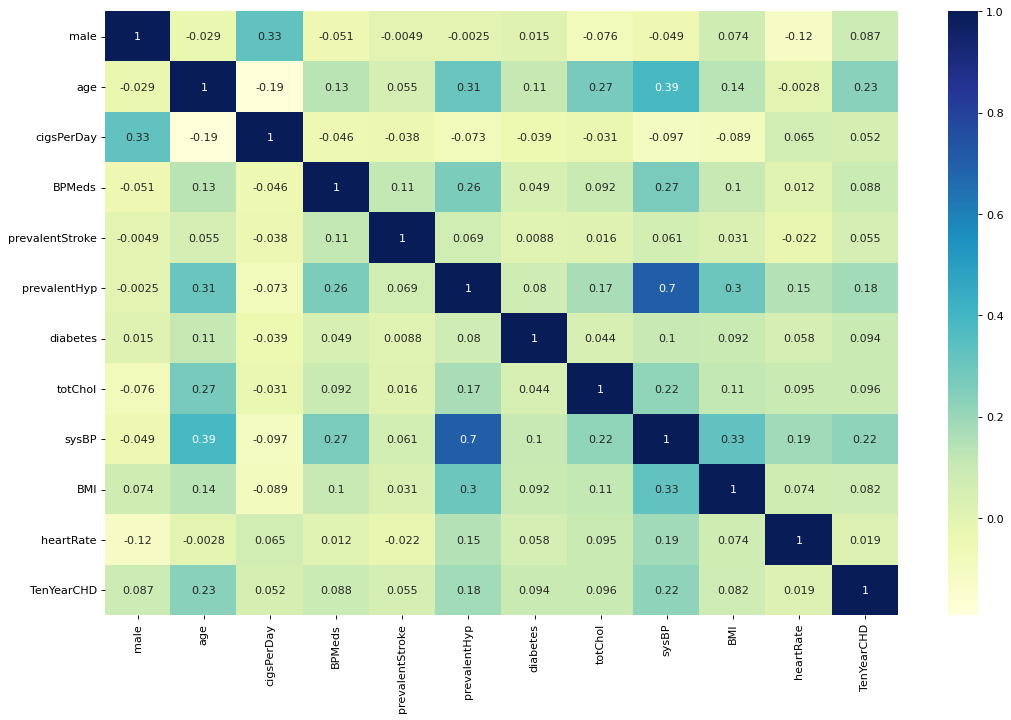

In [279]:
plt.figure(figsize=(16,10), dpi= 80)
df.corr()
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

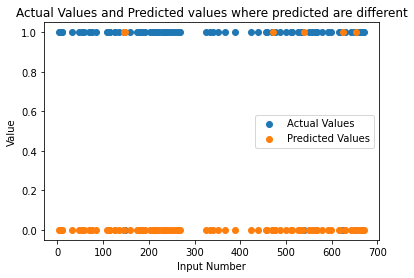

In [280]:
#Actual Values and Predicted values where predicted values are different
temp_true = []
temp_pred = []
temp_index = []
temp_np_pred = np.array(y_pred3)
temp_np_test = np.array(y_test)
for i in range(len(temp_np_test)):
  if temp_np_test[i] != temp_np_pred[i]:
    temp_true.append(temp_np_test[i])
    temp_pred.append(temp_np_pred[i])
    temp_index.append(i)
plt.scatter(temp_index,temp_true)
plt.scatter(temp_index,temp_pred)
plt.title("Actual Values and Predicted values where predicted are different")
plt.ylabel("Value")
plt.xlabel("Input Number")
plt.legend(["Actual Values","Predicted Values"])
plt.show()

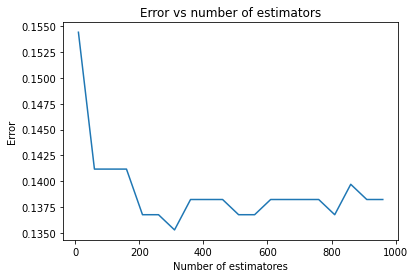

In [285]:
#Error vs number of estimators for Random Forest Classifier model
num_estimators = [i for i in range(10,1000,50)]
error_num_list = []
for num in num_estimators:
  rfc = RandomForestClassifier(n_estimators=num)
  rfc.fit(x_train, y_train)
  y_pred_new = rfc.predict(x_test)
  mse = mean_squared_error(y_test, y_pred_new)
  error_num_list.append(mse)
plt.plot(num_estimators,error_num_list)
plt.title("Error vs number of estimators")
plt.ylabel("Error")
plt.xlabel("Number of estimatores")
plt.show()

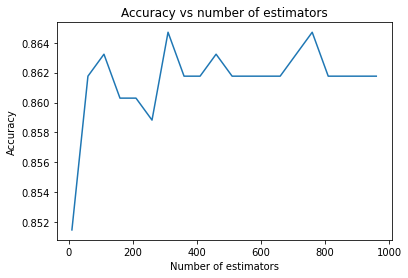

In [286]:
#Accuracy vs number of estimators for Random Forest Classifier model
num_estimators = [i for i in range(10,1000,50)]
acc_num_list = []
for num in num_estimators:
  rfc = RandomForestClassifier(n_estimators=num)
  rfc.fit(x_train, y_train)
  y_pred_new = rfc.predict(x_test)
  acc_temp = metrics.accuracy_score(y_test, y_pred_new)
  acc_num_list.append(acc_temp)
plt.plot(num_estimators,acc_num_list)
plt.title("Accuracy vs number of estimators")
plt.ylabel("Accuracy")
plt.xlabel("Number of estimators")
plt.show()

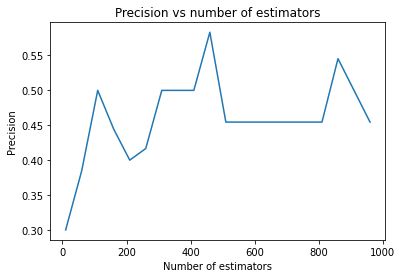

In [287]:
#Precision vs number of estimators for Random Forest Classifier model
num_estimators = [i for i in range(10,1000,50)]
acc_num_list = []
for num in num_estimators:
  rfc = RandomForestClassifier(n_estimators=num)
  rfc.fit(x_train, y_train)
  y_pred_new = rfc.predict(x_test)
  acc_temp = metrics.precision_score(y_test, y_pred_new)
  acc_num_list.append(acc_temp)
plt.plot(num_estimators,acc_num_list)
plt.title("Precision vs number of estimators")
plt.ylabel("Precision")
plt.xlabel("Number of estimators")
plt.show()

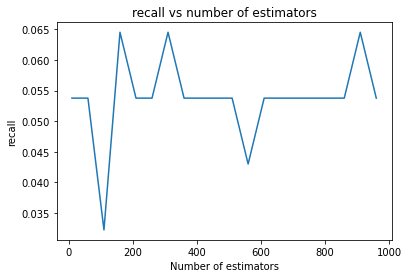

In [288]:
#Recall vs number of estimators for Random Forest Classifier model
num_estimators = [i for i in range(10,1000,50)]
acc_num_list = []
for num in num_estimators:
  rfc = RandomForestClassifier(n_estimators=num)
  rfc.fit(x_train, y_train)
  y_pred_new = rfc.predict(x_test)
  acc_temp = metrics.recall_score(y_test, y_pred_new)
  acc_num_list.append(acc_temp)
plt.plot(num_estimators,acc_num_list)
plt.title("recall vs number of estimators")
plt.ylabel("recall")
plt.xlabel("Number of estimators")
plt.show()

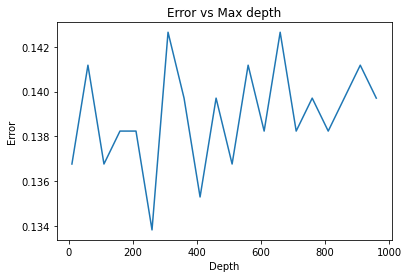

In [289]:
#Error vs max depth for Random Forest Classifier model
max_depth = [i for i in range(10,1000,50)]
error_num_list = []
for num in max_depth:
  rfc = RandomForestClassifier(max_depth=num)
  rfc.fit(x_train, y_train)
  y_pred_new = rfc.predict(x_test)
  mse = mean_squared_error(y_test, y_pred_new)
  error_num_list.append(mse)
plt.plot(max_depth,error_num_list)
plt.title("Error vs Max depth")
plt.ylabel("Error")
plt.xlabel("Depth")
plt.show()

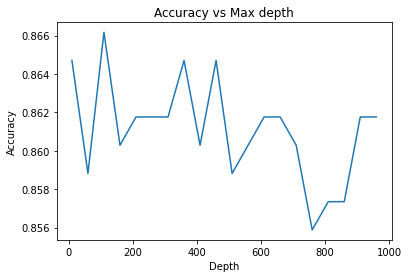

In [290]:
#Accuacy vs max depth for Random Forest Classifier model
max_depth = [i for i in range(10,1000,50)]
acc_num_list = []
for num in max_depth:
  rfc = RandomForestClassifier(max_depth=num)
  rfc.fit(x_train, y_train)
  y_pred_new = rfc.predict(x_test)
  acc_temp = metrics.accuracy_score(y_test, y_pred_new)
  acc_num_list.append(acc_temp)
plt.plot(max_depth,acc_num_list)
plt.title("Accuracy vs Max depth")
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.show()

Feature importance plot based on Random Forest Classifier model

Text(0.5, 0, 'Relative Importance')

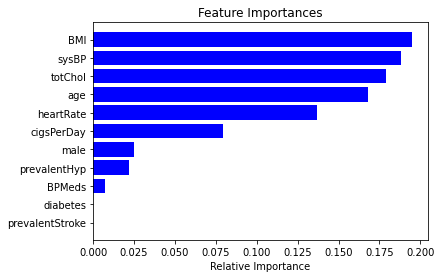

In [291]:
features1=df.columns
importances1 = rfc.feature_importances_
indices1 = np.argsort(importances1)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices1)), importances1[indices1], color='b', align='center')
plt.yticks(range(len(indices1)), features1[indices1])
plt.xlabel('Relative Importance')

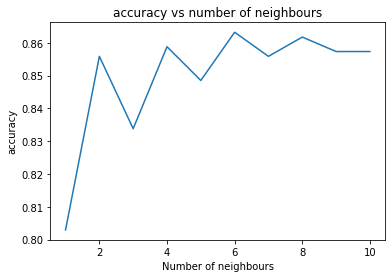

In [293]:
#Accuracy vs number of neighbours for KNN model
num_neigh = [i for i in range(1,11)]
accuracy_temp_list = []
for num in num_neigh:
  neigh = KNeighborsClassifier(n_neighbors = num)
  neigh.fit(x_train, y_train)
  y_pred_new = neigh.predict(x_test)
  accuracy_temp = metrics.accuracy_score(y_test, y_pred_new)
  accuracy_temp_list.append(accuracy_temp)
plt.plot(num_neigh,accuracy_temp_list)
plt.title("accuracy vs number of neighbours")
plt.ylabel("accuracy")
plt.xlabel("Number of neighbours")
plt.show()

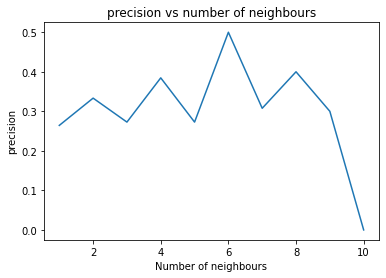

In [294]:
#Precision vs number of neighbours for KNN Model
num_neigh = [i for i in range(1,11)]
precision_temp_list = []
for num in num_neigh:
  neigh = KNeighborsClassifier(n_neighbors = num)
  neigh.fit(x_train, y_train)
  y_pred_new = neigh.predict(x_test)
  precision_temp = metrics.precision_score(y_test, y_pred_new)
  precision_temp_list.append(precision_temp)
plt.plot(num_neigh,precision_temp_list)
plt.title("precision vs number of neighbours")
plt.ylabel("precision")
plt.xlabel("Number of neighbours")
plt.show()

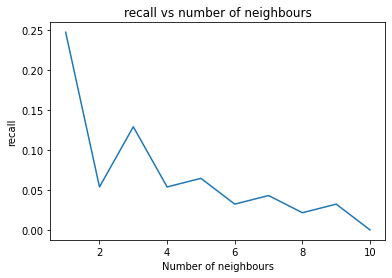

In [295]:
#Recall vs number of neighbours for KNN Model
num_neigh = [i for i in range(1,11)]
recall_temp_list = []
for num in num_neigh:
  neigh = KNeighborsClassifier(n_neighbors = num)
  neigh.fit(x_train, y_train)
  y_pred_new = neigh.predict(x_test)
  recall_temp = metrics.recall_score(y_test, y_pred_new)
  recall_temp_list.append(recall_temp)
plt.plot(num_neigh,recall_temp_list)
plt.title("recall vs number of neighbours")
plt.ylabel("recall")
plt.xlabel("Number of neighbours")
plt.show()

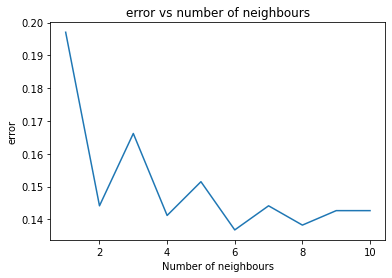

In [296]:
#Error vs number of neighbours for KNN Model
num_neigh = [i for i in range(1,11)]
error_temp_list = []
for num in num_neigh:
  neigh = KNeighborsClassifier(n_neighbors = num)
  neigh.fit(x_train, y_train)
  y_pred_new = neigh.predict(x_test)
  mse = mean_squared_error(y_test, y_pred_new)
  error_temp_list.append(mse)
plt.plot(num_neigh,error_temp_list)
plt.title("error vs number of neighbours")
plt.ylabel("error")
plt.xlabel("Number of neighbours")
plt.show()

Plotting learning curves

In [297]:
def learning_curves(metric):
  train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),df2,df3,  scoring=metric)
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  print(test_scores )

  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)
  plt.subplots(1, figsize=(10,10))
  plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
  plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

  plt.title("Learning Curve")
  plt.xlabel("Training Set Size"), plt.ylabel(metric+" Score"), plt.legend(loc="best")
  plt.tight_layout()
  plt.show()

Plot for proportion of variance v/s principal component

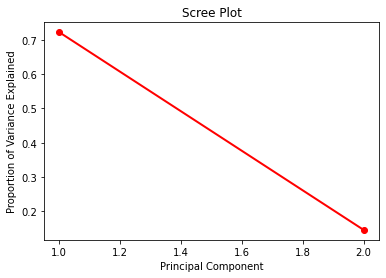

In [298]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Plotting ROC curve

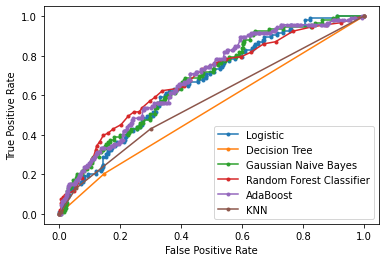

In [307]:
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest Classifier')
plt.plot(adb_fpr, adb_tpr, marker='.', label='AdaBoost')
plt.plot(neigh_fpr, neigh_tpr, marker='.', label='KNN')
# plt.plot(clf_sgd_fpr, clf_sgd_tpr, marker='.', label='SGD Classifier')
# plt.plot(clf_svm_fpr, clf_svm_tpr, marker='.', label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


Plot for elbow method graph(error v/s number of clusters) for k-means clustering(Unsupervised learning)

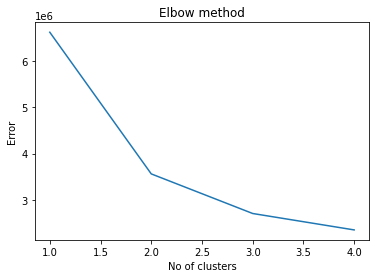

In [308]:
plot =[]
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i).fit(x_train)
    kmeans.fit(x_train)
    plot.append(kmeans.inertia_)
plt.plot(range(1, 5), plot)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Density plot for the output column

No handles with labels found to put in legend.


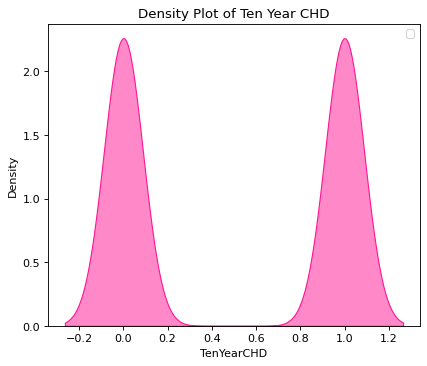

In [309]:
#For "TenYearCHD" feature column
plt.figure(figsize=(6,5), dpi= 80)
sns.kdeplot(y_res, shade=True, color="deeppink", alpha=0.5)
plt.title('Density Plot of Ten Year CHD', fontsize=12)
plt.legend()
plt.show()